In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile

zip_path = "/content/drive/MyDrive/chest.zip"
extract_path = "/content/drive/MyDrive/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision.transforms import transforms


In [ ]:
# Veri dönüşümleri
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Gerekli boyut dönüşümü
    transforms.ToTensor(),  # Tensöre dönüştürme
    transforms.Normalize((0.5,), (0.5,))  # Normalizasyon
])

# Eğitim ve test veri setlerini yükleyin
train_dataset = torchvision.datasets.ImageFolder(root='/content/drive/MyDrive/dataset/chest_xray/train', transform=transform)
test_dataset = torchvision.datasets.ImageFolder(root='/content/drive/MyDrive/dataset/chest_xray/test', transform=transform)


In [ ]:
batch_size = 16

# Eğitim veri yükleyicisi
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Test veri yükleyicisi
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(64 * 28 * 28, 128),
            nn.ReLU(inplace=True),
            nn.Linear(128, 2)  # Sınıf sayısına göre çıkış katmanının boyutunu ayarlayın
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# Modeli oluşturun
model = CNN()


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # GPU kullanımı için kontrol

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10

model.to(device)

for epoch in range(num_epochs):
    train_loss = 0.0
    train_correct = 0
    total_train = 0

    model.train()
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        train_correct += (predicted == labels).sum().item()
        train_loss += loss.item()

    train_accuracy = 100 * train_correct / total_train
    train_loss /= len(train_loader)

    print('Epoch [{}/{}], Train Loss: {:.4f}, Train Accuracy: {:.2f}%'
          .format(epoch+1, num_epochs, train_loss, train_accuracy))

print('Eğitim tamamlandı.')


# Modelinizi kaydetmek için dosya adı belirleyin
model_path = "/content/drive/MyDrive/model2.pt"

# Modelinizi kaydedin
torch.save(model.state_dict(), model_path)


Epoch [1/10], Train Loss: 0.1854, Train Accuracy: 92.45%
Epoch [2/10], Train Loss: 0.0819, Train Accuracy: 96.91%
Epoch [3/10], Train Loss: 0.0589, Train Accuracy: 97.70%
Epoch [4/10], Train Loss: 0.0472, Train Accuracy: 98.43%
Epoch [5/10], Train Loss: 0.0293, Train Accuracy: 98.91%
Epoch [6/10], Train Loss: 0.0252, Train Accuracy: 99.08%
Epoch [7/10], Train Loss: 0.0239, Train Accuracy: 99.19%
Epoch [8/10], Train Loss: 0.0117, Train Accuracy: 99.60%
Epoch [9/10], Train Loss: 0.0053, Train Accuracy: 99.90%
Epoch [10/10], Train Loss: 0.0130, Train Accuracy: 99.60%
Eğitim tamamlandı.


In [ ]:
model.eval()


CNN(
  (features): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=50176, out_features=128, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=128, out_features=2, bias=True)
  )
)

In [ ]:
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print('Test Accuracy: {:.2f}%'.format(accuracy))


Test Accuracy: 78.37%


In [ ]:
''' dataseti silmek için
import shutil

folder_path = '/content/drive/MyDrive/dataset'  # Kopyaladığınız klasör yolunu buraya yapıştırın
shutil.rmtree(folder_path)
'''

In [ ]:
'''  reconnecting
function ConnectButton(){
    console.log("Working");
    document.querySelector("#connect").click()
}
setInterval(ConnectButton,10800000);
'''

In [ ]:
import torch

print(torch.cuda.is_available())

if torch.cuda.is_available():
    print(torch.cuda.get_device_name(0))


True
Tesla T4


In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import random
import matplotlib.pyplot as plt
import numpy as np



# Modeli yükleyin
model_path = "/content/drive/MyDrive/model.pt"  # Modelin dosya yolu
model = CNN()  # Model sınıfınızı buraya yerleştirin
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()


CNN(
  (features): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=50176, out_features=128, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=128, out_features=2, bias=True)
  )
)

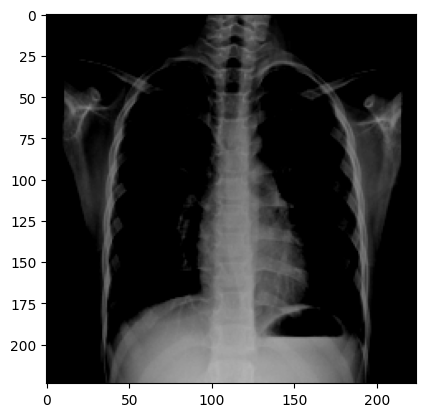

Predicted Label: 1
True Label: 0
Tahmin Yanlış!


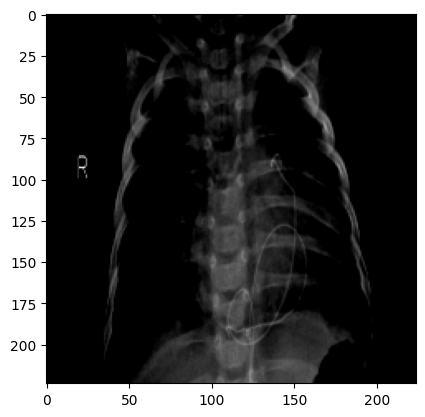

Predicted Label: 1
True Label: 1
Tahmin Doğru!


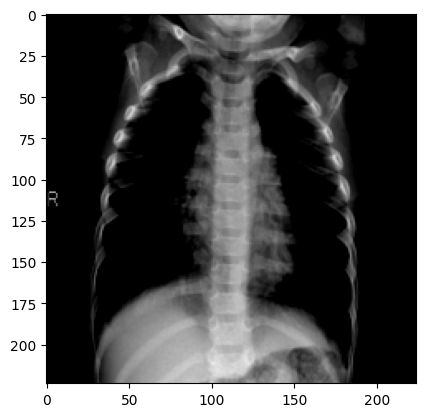

Predicted Label: 0
True Label: 0
Tahmin Doğru!


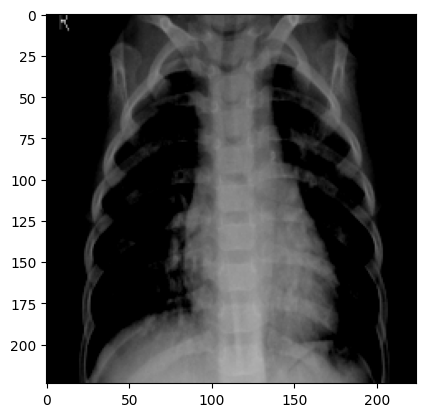

Predicted Label: 1
True Label: 1
Tahmin Doğru!


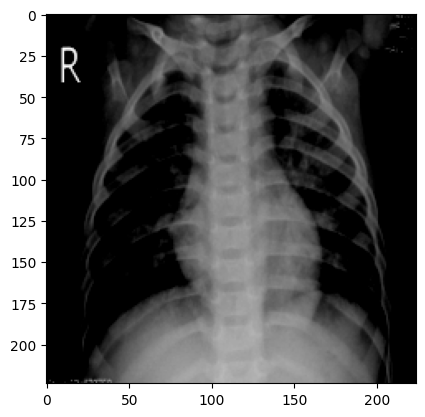

Predicted Label: 1
True Label: 1
Tahmin Doğru!


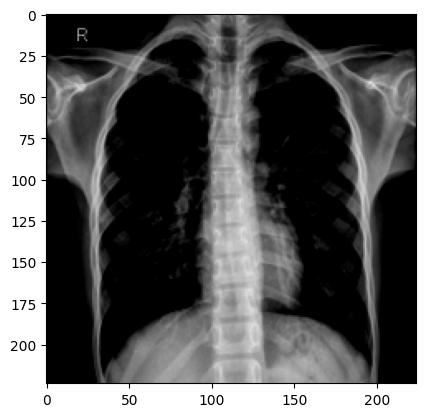

Predicted Label: 1
True Label: 0
Tahmin Yanlış!


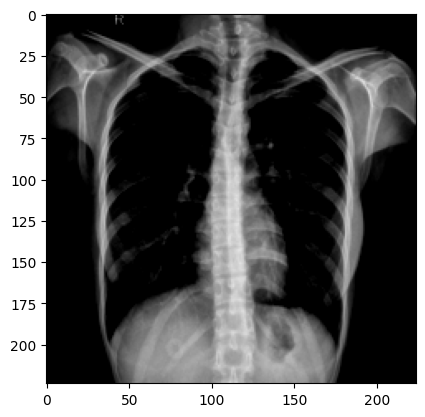

Predicted Label: 0
True Label: 0
Tahmin Doğru!


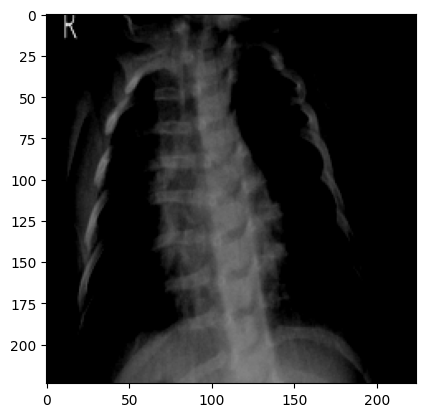

Predicted Label: 1
True Label: 1
Tahmin Doğru!


KeyboardInterrupt: ignored

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Test veri kümesini yükleyin ve DataLoader kullanarak rastgele bir resim seçin
test_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/dataset/chest_xray/test', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)

# Rastgele bir resim seçin ve tahmin yapın
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        predicted_labels = torch.argmax(outputs, dim=1)

        # Resimleri terminalde gösterin
        image = images.squeeze().cpu().numpy()
        plt.imshow(np.transpose(image, (1, 2, 0)))
        plt.show()

        # Tahmin sonucunu yazdırın
        print("Predicted Label:", predicted_labels.item())
        print("True Label:", labels.item())

        # Tahmin doğruluğunu kontrol edin
        if predicted_labels == labels:
            print("Tahmin Doğru!")
        else:
            print("Tahmin Yanlış!")
